In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
# Load the data set
url = "https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/ANXIETY.csv"
df = pd.read_csv(url)



In [4]:
df.head()

,Instructor,Final,Anxiety,Gender
0,A,35,93.552,Female
1,A,70,95.164,Male
2,A,70,83.880,Female
3,A,30,84.686,Male
4,A,92,82.268,Male


In [5]:
# Check for missing values
print(df.isnull().sum())

# There are no missing values, so we proceed to removing outliers



Instructor    0
Final         0
Anxiety       0
Gender        0
dtype: int64


Text(0.5, 1.0, 'Null Values')

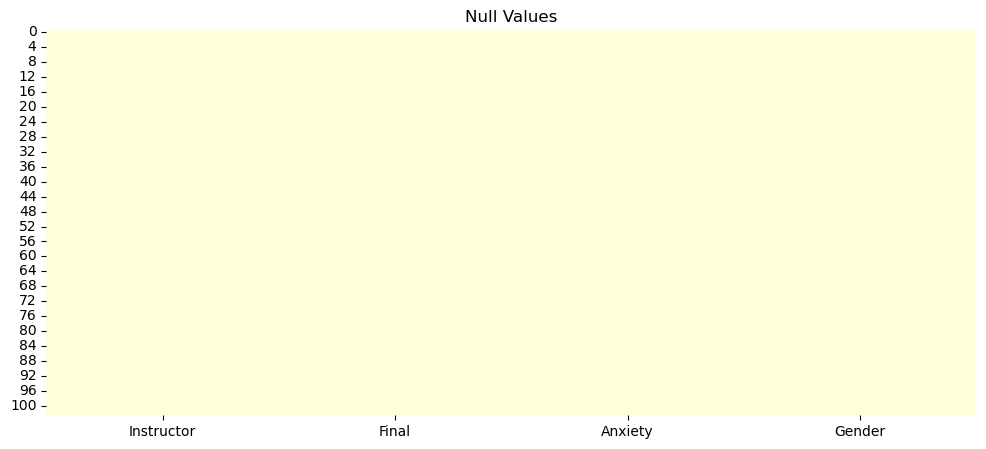

In [11]:
#create a heatmap of null values 
plt.figure(figsize=(12,5)) 
p = sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu')
#p = sns.heatmap(df.isnull(), cbar = False)
p.set_title("Null Values")

In [12]:
#check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Instructor  103 non-null    object 
 1   Final       103 non-null    int64  
 2   Anxiety     103 non-null    float64
 3   Gender      103 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [13]:
#Examine the descriptive statistics
df.describe()

,Final,Anxiety
count,103.000000,103.000000
mean,59.757282,74.343670
std,23.185300,17.181858
min,10.000000,0.056000
25%,40.000000,69.775000
50%,65.000000,79.044000
75%,80.000000,84.686000
max,100.000000,97.582000


In [14]:
#Examine counts of levels of Gender
df['Gender'].value_counts()

Male      52
Female    51
Name: Gender, dtype: int64

In [15]:
#Examine counts of levels of Instructor
df['Instructor'].value_counts()

B    34
A    33
C    20
D    16
Name: Instructor, dtype: int64

In [16]:
#Examine which variables are object type
df.dtypes == 'object'

Instructor     True
Final         False
Anxiety       False
Gender         True
dtype: bool

In [17]:
#Examine which variables are object type as a dataframe
df[df.dtypes[df.dtypes == 'object'].index]

,Instructor,Gender
0,A,Female
1,A,Male
2,A,Female
3,A,Male
4,A,Male
...,...,...
98,D,Female
99,D,Female
100,D,Male
101,D,Female


In [19]:
#Review categorical variables crosstab()
freq_table = pd.crosstab(df['Gender'], df['Instructor'])
freq_table 

Instructor,A,B,C,D
Gender,,,,
Female,14,15,12,10
Male,19,19,8,6


In [20]:
#Review categorical variables crosstab()
freq_table = pd.crosstab(df['Instructor'], df['Gender'])
freq_table 

Gender,Female,Male
Instructor,,
A,14,19
B,15,19
C,12,8
D,10,6


After analyzing the descriptive statistics for the instructors Final and Anxiety mean and median scores, the data suggests that as the Anxiety score goes up, the Final score goes down

In [21]:
#Check for duplicate values
df.loc[df.duplicated()] 

,Instructor,Final,Anxiety,Gender
53,B,20,81.462,Female


In [22]:
#Drop the duplicate values
df.drop_duplicates(inplace = True)

In [23]:
# reset the index 
df = df.reset_index(drop = True)

In [24]:
#check the index reset
df.loc[52:55,]

,Instructor,Final,Anxiety,Gender
52,B,30,84.686,Female
53,B,85,80.656,Male
54,B,60,71.790,Female
55,B,80,69.372,Male


In [25]:
#Note any change in the descriptive statistics
df.describe()

,Final,Anxiety
count,102.000000,102.000000
mean,60.147059,74.273882
std,22.958161,17.252031
min,10.000000,0.056000
25%,41.250000,69.573500
50%,65.000000,78.641000
75%,80.000000,84.686000
max,100.000000,97.582000


In [26]:
#Grouped by groupby()
#Examine the mean values by instructor for each quantitative variable 
group_1 = df.groupby(['Instructor'])
result_1 = group_1[['Final', 'Anxiety']].mean()
result_1 

,Final,Anxiety
Instructor,,
A,52.666667,82.960121
B,58.575758,77.700667
C,63.100000,72.193000
D,75.125000,51.891875


In [27]:
#Grouped by groupby()
#Examine the median values by instructor for each quantitative variable 
group_1 = df.groupby(['Instructor'])
result_1 = group_1[['Final', 'Anxiety']].median()
result_1 

,Final,Anxiety
Instructor,,
A,50.0,84.686
B,59.0,79.044
C,62.5,72.193
D,77.5,55.267


In [31]:
#examine skew of numerical distributions 
df.skew() 

/var/folders/w0/1lt_zm1j5b93t98m98560scc0000gn/T/ipykernel_74439/2590808731.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Final     -0.325956
Anxiety   -1.995692
dtype: float64

In [28]:
#Grouped by groupby()
#Examine the skew values by instructor for each quantitative variable 
group_1 = df.groupby(['Instructor'])
result_1 = group_1[['Final', 'Anxiety']].skew()
result_1 

,Final,Anxiety
Instructor,,
A,-0.082272,-4.054128
B,-0.135733,-0.231290
C,-0.395085,-0.224214
D,-0.902609,-0.392188


In [29]:
#Examine the skewness
df['Anxiety'].skew()

-1.9956918398044046

Text(0.5, 1.0, 'Anxiet Boxplot')

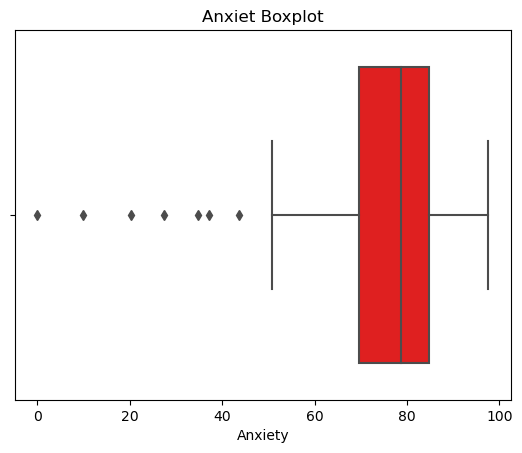

In [34]:
#Check for outliers 
p = sns.boxplot(x = df['Anxiety'], color = 'red')
p.set_title("Anxiet Boxplot")

Text(0.5, 1.0, 'Anxiet Boxplot')

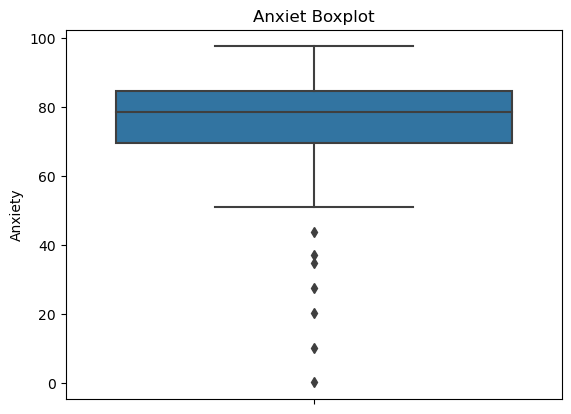

In [35]:
#Change to vertical orientation
p = sns.boxplot(y = df['Anxiety'])
p.set_title("Anxiet Boxplot")

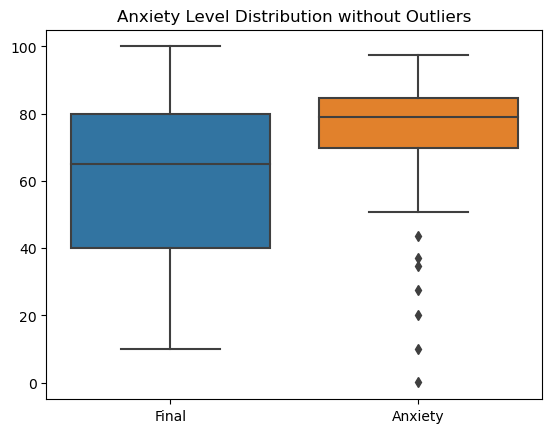

In [7]:
# Using boxplot to visualize data distribution after removing outliers
sns.boxplot(data=df)
plt.title('Anxiety Level Distribution without Outliers')
plt.show()



<AxesSubplot:xlabel='Instructor', ylabel='count'>

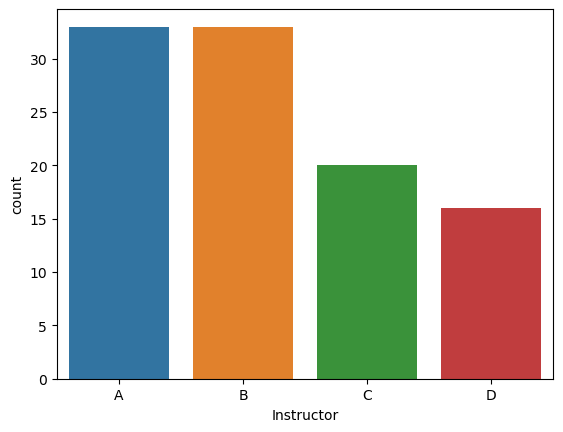

In [36]:
#Examine the categories visually
sns.countplot(data = df, x = 'Instructor')

<AxesSubplot:xlabel='Gender', ylabel='count'>

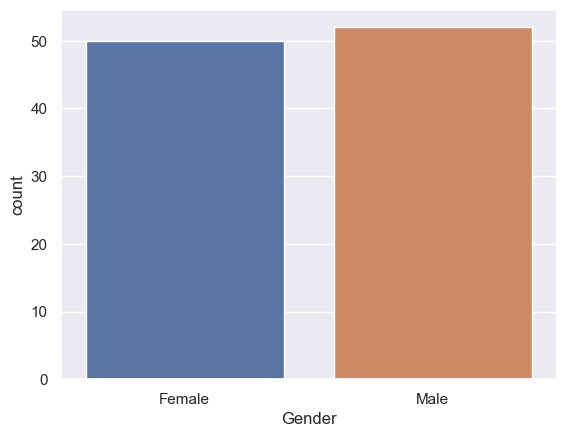

In [37]:
#Change the grapics theme and examine count of Gender
sns.set_theme() 
sns.countplot(data = df, x = 'Gender')

Text(0.5, 1.0, 'Anxiety over Instructor')

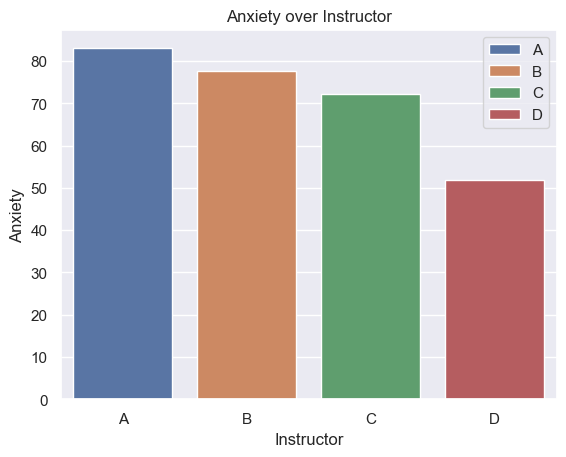

In [38]:
#create a barplot of anxiety across the instructors 
ax = sns.barplot(data = df, x = 'Instructor', 
                 y = 'Anxiety', hue = 'Instructor',
                ci = False, dodge = False )
ax.legend(loc = 'best')
ax.set_title('Anxiety over Instructor')

Text(0.5, 1.0, 'Anxiety over Instructor')

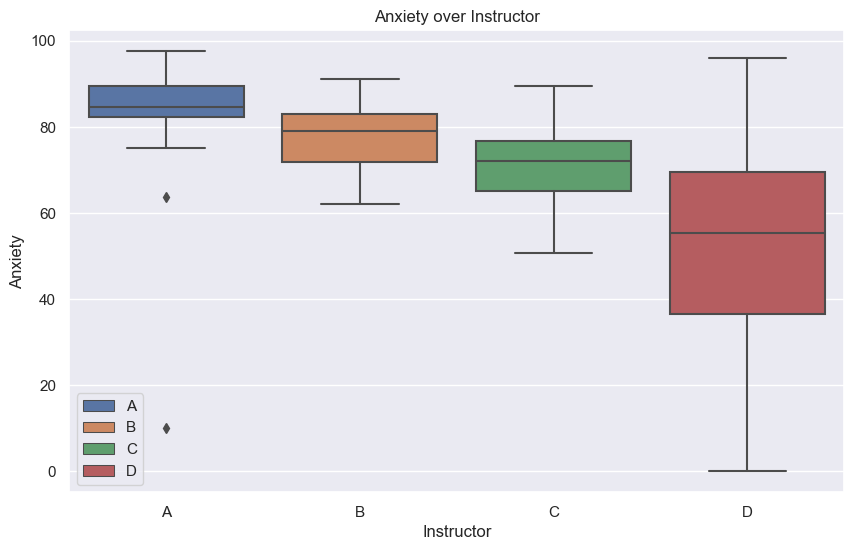

In [39]:
#create a boxplot of anxiety across the instructors 
plt.figure(figsize =(10, 6))
ax = sns.boxplot(data = df, x = 'Instructor', 
                 y = 'Anxiety', hue = 'Instructor',
                dodge = False )
ax.legend(loc = 'best')
ax.set_title('Anxiety over Instructor')

Text(0.5, 1.0, 'Final over Instructor')

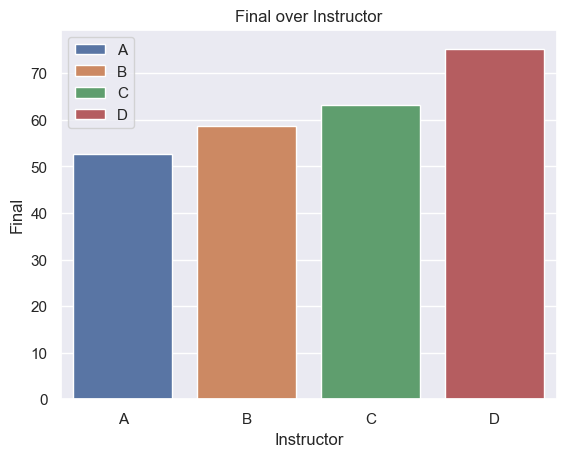

In [40]:
#create a barplot of final across the instructors 
ax = sns.barplot(data = df, x = 'Instructor', 
                 y = 'Final', hue = 'Instructor',
                ci = False, dodge = False )
ax.legend(loc = 'best')
ax.set_title('Final over Instructor')

Text(0.5, 1.0, 'Final over Instructor')

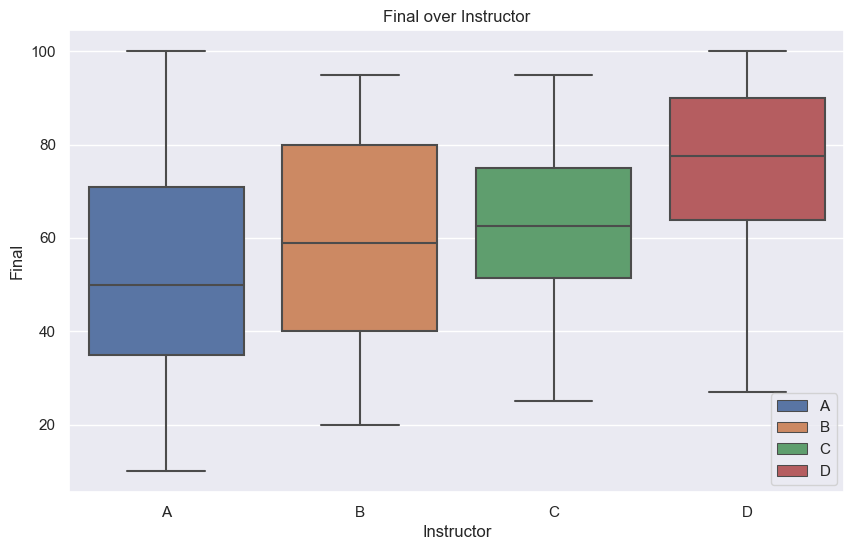

In [41]:
#create a boxplot of final across the instructors 
plt.figure(figsize =(10, 6))
ax = sns.boxplot(data = df, x = 'Instructor', 
                 y = 'Final', hue = 'Instructor',
                dodge = False )
ax.legend(loc = 'best')
ax.set_title('Final over Instructor')

Text(0.5, 1.0, 'Final over Gender')

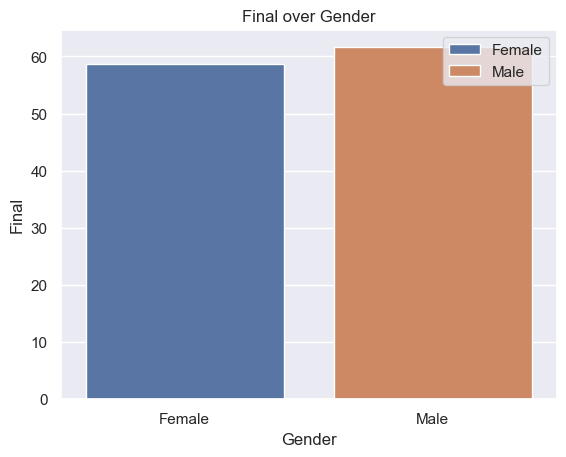

In [42]:
#create a barplot of Final across the genders
ax = sns.barplot(data = df, x = 'Gender', 
                 y = 'Final', hue = 'Gender',
                ci = False, dodge = False )
ax.legend(loc = 'best')
ax.set_title('Final over Gender')

In [43]:
#Subset for Gender equal to male 
df_male = df[df['Gender']== 'Male']

In [44]:
#Check the descriptive statistics 
df_male.describe()

,Final,Anxiety
count,52.000000,52.000000
mean,61.596154,74.383731
std,22.279208,16.421659
min,10.000000,10.000000
25%,40.000000,68.969000
50%,65.000000,79.044000
75%,80.000000,84.686000
max,100.000000,97.582000


In [45]:
#Subset for Gender equal to female 
df_female = df[df['Gender']== 'Female']

In [46]:
#Check the descriptive statistics
df_female.describe()

,Final,Anxiety
count,50.000000,50.000000
mean,58.640000,74.159640
std,23.775103,18.242357
min,10.000000,0.056000
25%,46.250000,71.185500
50%,60.000000,78.238000
75%,75.000000,84.686000
max,100.000000,95.970000


Text(0.5, 1.0, 'Final over Gender')

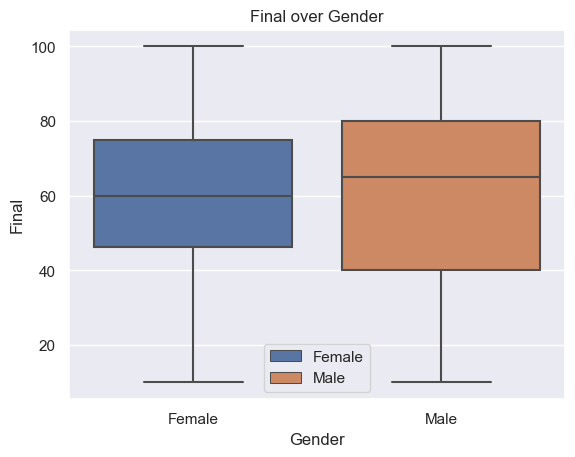

In [47]:
#create a barplot of Final across the genders
ax = sns.boxplot(data = df, x = 'Gender', 
                 y = 'Final', hue = 'Gender',
                 dodge = False )
ax.legend(loc = 'best')
ax.set_title('Final over Gender')

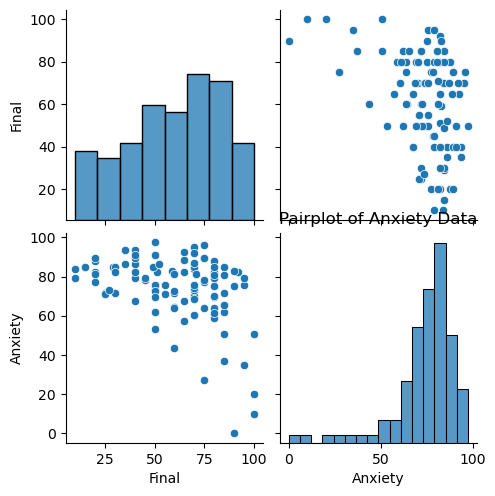

In [8]:
# Visualizing relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Anxiety Data')
plt.show()



In [9]:
# Statistical analysis of the data
print(df.describe())

            Final     Anxiety
count  103.000000  103.000000
mean    59.757282   74.343670
std     23.185300   17.181858
min     10.000000    0.056000
25%     40.000000   69.775000
50%     65.000000   79.044000
75%     80.000000   84.686000
max    100.000000   97.582000


Text(0, 0.5, 'Frequency')

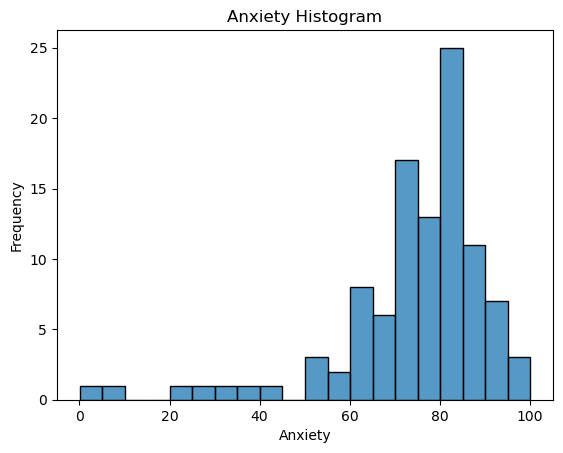

In [33]:
#Examine the histogram of anxiety 
ax = sns.histplot(x = df['Anxiety'], binwidth = 5)
ax.set_title('Anxiety Histogram')
ax.set_ylabel('Frequency')

Text(0.5, 1.0, 'Anxiety over Gender')

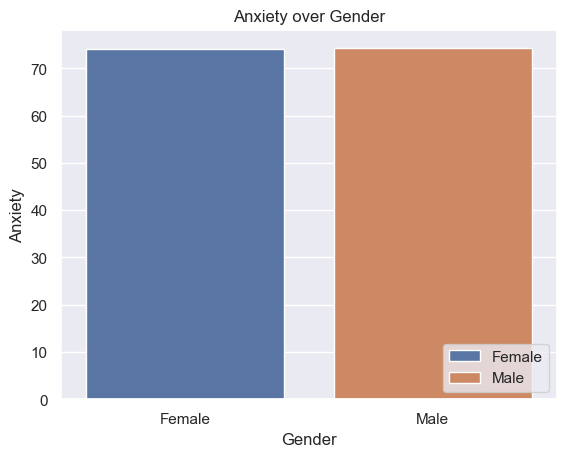

In [48]:
#create a barplot of Anxiety across the genders
ax = sns.barplot(data = df, x = 'Gender', 
                 y = 'Anxiety', hue = 'Gender',
                ci = False, dodge = False )
ax.legend(loc = 'lower right')
ax.set_title('Anxiety over Gender')

Text(0.5, 1.0, 'Anxiety over Gender')

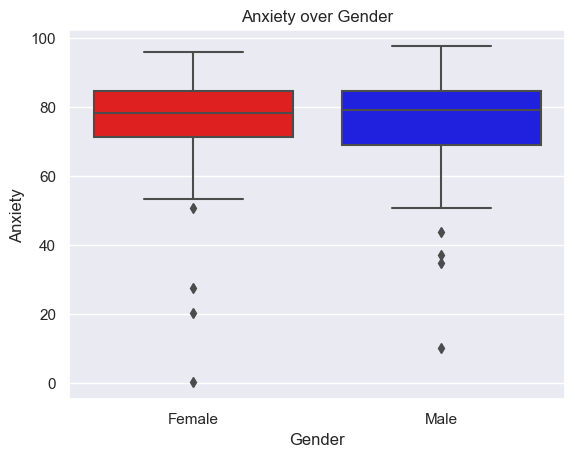

In [49]:
#create a boxplot of Anxiety across the genders
ax = sns.boxplot(data = df, x = 'Gender', 
                 y = 'Anxiety',
                 dodge = False, palette = ['red', 'blue'])
#ax.legend(loc = 'best')
ax.set_title('Anxiety over Gender')

# Subset the data for further analysis

We want to understand the differences between those who passed and those who failed

In [50]:
#We want to subset a group of those who failed and those who passed
subset_df_pass = df[df['Final']>= 50]
subset_df_fail = df[df['Final'] < 50]

In [51]:
# look at descriptives for pass group
subset_df_pass.describe() 

,Final,Anxiety
count,73.000000,73.000000
mean,71.849315,71.120219
std,14.357220,19.099615
min,50.000000,0.056000
25%,60.000000,63.730000
50%,70.000000,75.014000
75%,80.000000,83.074000
max,100.000000,97.582000


In [52]:
# look at descriptives for pass group
subset_df_fail.describe()

,Final,Anxiety
count,29.000000,29.000000
mean,30.689655,82.212414
std,10.744113,6.660155
min,10.000000,67.760000
25%,20.000000,79.044000
50%,30.000000,82.268000
75%,40.000000,86.298000
max,49.000000,93.552000
